다음 데이터 세트를 이용하여 다이아몬드 가격예측(회귀) 

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv" diamonds = pd.read_csv(url) 

2. Dense layer만 이용 FNCC 구현

3. 순환 데이터 변환후 CNN 구현



각 단계별로 수행완료후

검사받은 이후에 다음 단계 진행

### EDA 안바라고, 가격을 예측하고 분류하고 해라.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from scipy import stats  # 과학용 계산 라이브러리
from sklearn.model_selection import train_test_split

# data load

In [2]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv"

diamonds = pd.read_csv(url)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# data pre-processing

In [3]:
type(diamonds)

pandas.core.frame.DataFrame

In [4]:
# 결측치 확인
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
# 결측치 제거
data = diamonds.dropna()
data.isnull().sum() # 위에서 결측치가 없었기에, 할 필욘 없긴함.

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

- ML DL에 넣을거라, 인코딩진행

In [7]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

data['cut'] = label.fit_transform(data['cut'])
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
data['color'] = label.fit_transform(data['color'])
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
data['clarity'] = label.fit_transform(data['clarity'])
data.head()
# 이 변수는 뭔지도 감이 안옵니다.. 영어를 잘 못해요

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


- 아래 standard 이거 넘 오래걸려서 작동이안되여

In [12]:
from sklearn.preprocessing import StandardScaler

# 표준화(Standardization)
scaler = StandardScaler()
scaled_data_standard = scaler.fit_transform(data.drop('price', axis=1))
scaled_df_standard = pd.DataFrame(scaled_data_standard, columns=data.columns[:-1])  # 데이터프레임으로 변환
scaled_df_standard

,carat,cut,color,clarity,depth,table,price,x,y
0,-1.198168,-0.538099,-0.937163,-0.484264,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129
1,-1.240361,0.434949,-0.937163,-1.064117,-1.360738,1.585529,-1.641325,-1.658774,-1.741175
2,-1.198168,-1.511147,-0.937163,0.095589,-3.385019,3.375663,-1.498691,-1.457395,-1.741175
3,-1.071587,0.434949,1.414272,0.675442,0.454133,0.242928,-1.364971,-1.317305,-1.287720
4,-1.029394,-1.511147,2.002131,-0.484264,1.082358,0.242928,-1.240167,-1.212238,-1.117674
...,...,...,...,...,...,...,...,...,...
53935,-0.164427,-0.538099,-1.525021,-1.064117,-0.662711,-0.204605,0.016798,0.022304,-0.054888
53936,-0.164427,-1.511147,-1.525021,-1.064117,0.942753,-1.099672,-0.036690,0.013548,0.100988
53937,-0.206621,1.407998,-1.525021,-1.064117,0.733344,1.137995,-0.063434,-0.047741,0.030135
53938,0.130927,0.434949,0.826413,-0.484264,-0.523105,0.242928,0.373383,0.337506,0.285204


In [14]:
x=scaled_df_standard

X = x.values
X

array([[-1.19816781, -0.53809897, -0.93716275, ..., -1.58783745,
        -1.53619556, -1.57112919],
       [-1.24036129,  0.43494935, -0.93716275, ..., -1.64132529,
        -1.65877419, -1.74117497],
       [-1.19816781, -1.51114729, -0.93716275, ..., -1.49869105,
        -1.45739502, -1.74117497],
       ...,
       [-0.20662095,  1.40799767, -1.52502147, ..., -0.06343409,
        -0.04774083,  0.03013526],
       [ 0.13092691,  0.43494935,  0.8264134 , ...,  0.37338325,
         0.33750627,  0.28520393],
       [-0.10113725, -0.53809897, -1.52502147, ...,  0.08811478,
         0.11861587,  0.14349912]])

In [15]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [16]:
X = data.drop('price',axis=1)
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75


In [17]:
y = data['price']
y.value_counts()

price
605      132
802      127
625      126
828      125
776      124
        ... 
8816       1
14704      1
14699      1
14698      1
9793       1
Name: count, Length: 11602, dtype: int64

# Dense layer만 이용 FNCC 구현

In [18]:
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40455, 9) (13485, 9) (40455,) (13485,)


In [20]:
#Defining the model 
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam


input_layer = Input(shape=(9,))

hidden1 = Dense(8, activation='tanh')(input_layer)
hidden2 = Dense(64, activation='tanh')(hidden1)
hidden3 = Dense(32, activation='tanh')(hidden2)
output_layer = Dense(1)(hidden3)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='Adam', loss='mse', metrics=['mse'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9)]               0         
                                                                 
 dense (Dense)               (None, 8)                 80        
                                                                 
 dense_1 (Dense)             (None, 64)                576       
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,769
Trainable params: 2,769
Non-trainable params: 0
_________________________________________________________________


In [21]:
history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/30
1265/1265 [==============================] - 6s 4ms/step - loss: 31111836.0000 - mse: 31111836.0000 - val_loss: 31170850.0000 - val_mse: 31170850.0000
Epoch 2/30
1265/1265 [==============================] - 5s 4ms/step - loss: 30789462.0000 - mse: 30789462.0000 - val_loss: 30852000.0000 - val_mse: 30852000.0000
Epoch 3/30
1265/1265 [==============================] - 5s 4ms/step - loss: 30475376.0000 - mse: 30475376.0000 - val_loss: 30539054.0000 - val_mse: 30539054.0000
Epoch 4/30
1265/1265 [==============================] - 5s 4ms/step - loss: 30165594.0000 - mse: 30165594.0000 - val_loss: 30229630.0000 - val_mse: 30229630.0000
Epoch 5/30
1265/1265 [==============================] - 5s 4ms/step - loss: 29859628.0000 - mse: 29859628.0000 - val_loss: 29923928.0000 - val_mse: 29923928.0000
Epoch 6/30
1265/1265 [==============================] - 5s 4ms/step - loss: 29557610.0000 - mse: 29557610.0000 - val_loss: 29622430.0000 - val_mse: 29622430.0000
Epoch 7/30
1265/1265 [======

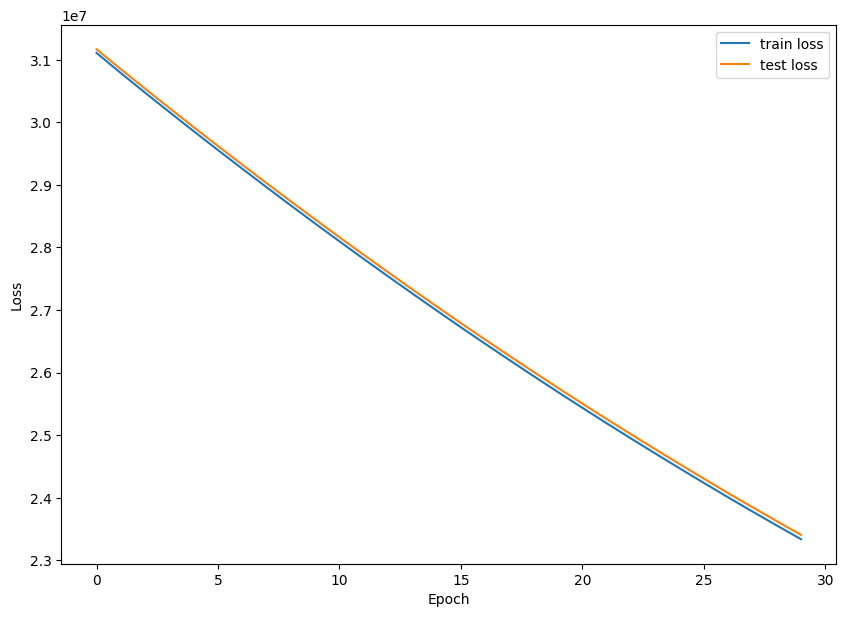

In [22]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(30), history.history['loss'], label='train loss')
plt.plot(range(30), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
model.evaluate(X_test, y_test)

422/422 [==============================] - 1s 2ms/step - loss: 23403402.0000 - mse: 23403402.0000


[23403402.0, 23403402.0]